In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
df= pd.read_csv(r'C:\Users\nermi\Downloads\ML.csv')

The overall purpose of this code is to build, tune, and evaluate a Gaussian Naive Bayes model to predict the total_amount based on other features in the dataset. The code includes steps for handling class imbalance, standardizing features, tuning hyperparameters, and visualizing results to ensure a robust evaluation of the model.

Class distribution before balancing:
total_amount
1    420034
2     52171
0      4187
Name: count, dtype: int64
Class distribution after balancing:
total_amount
1    420034
2    420034
0    420034
Name: count, dtype: int64
Cross-validation scores: [0.75487557 0.75380922 0.75493347 0.75628918 0.75511203]
Average cross-validation score: 0.7550038953580762
GaussianNB Validation Results:
Best Params: {'var_smoothing': 0.012328467394420659}
Validation Accuracy: 0.7551622887072454
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.93      0.80     83668
           1       0.80      0.51      0.62     83970
           2       0.81      0.83      0.82     84382

    accuracy                           0.76    252020
   macro avg       0.77      0.76      0.74    252020
weighted avg       0.77      0.76      0.74    252020

Validation Confusion Matrix:
[[77989  2186  3493]
 [28610 42509 12851]
 [ 5866  8698 69818]]

GaussianNB 

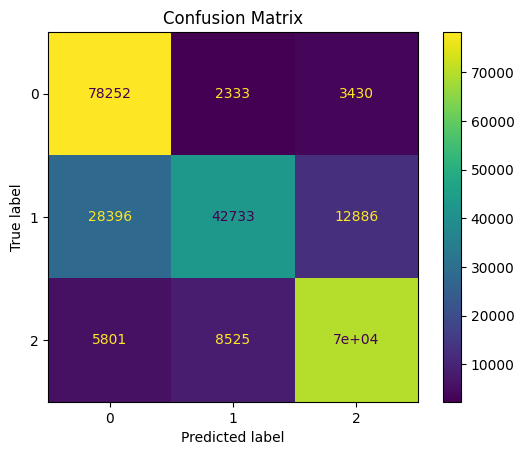

C:\Users\nermi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:510: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
C:\Users\nermi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:511: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
C:\Users\nermi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:510: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
C:\Users\nermi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:511: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
C:\Users\nermi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\naive_bayes.py:511: RuntimeWar

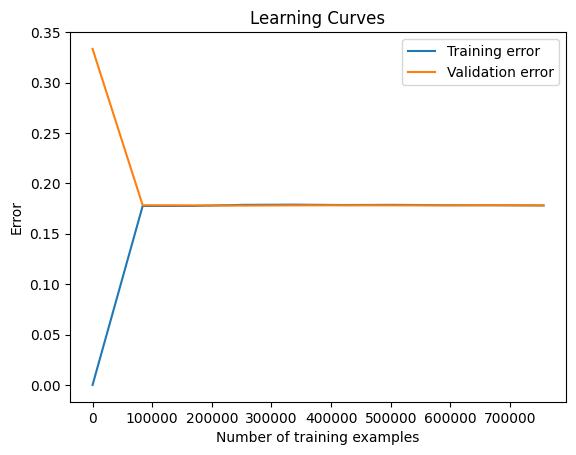

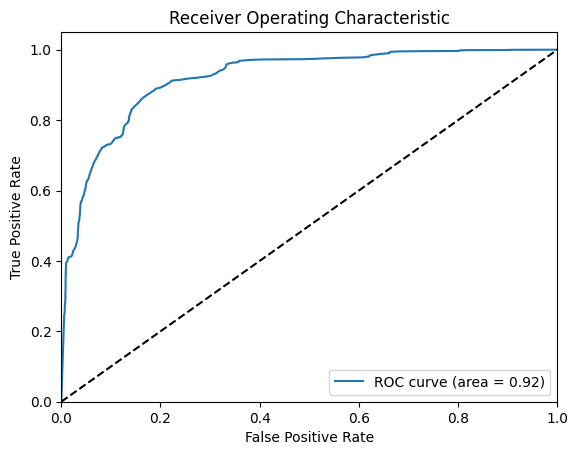

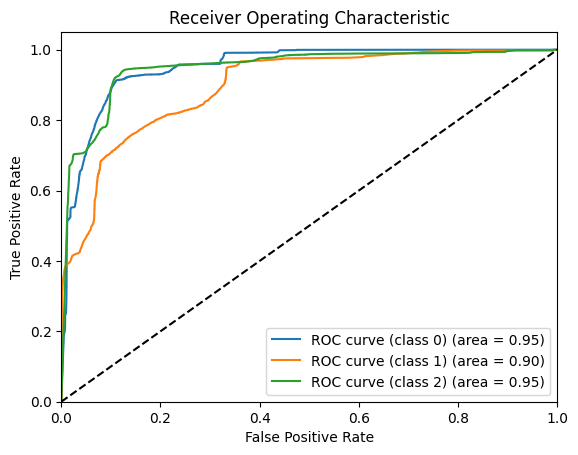

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load the dataset
#df = pd.read_csv(r'C:\Users\nermi\Downloads\ML.csv')

# Prepare the dataset
X = df.drop(columns=['total_amount', 'payment_type', 'date_range', 'mta_tax'])
y = df['total_amount']

# Remove constant features
X = X.loc[:, (X != X.iloc[0]).any()]

# Check class balance
print("Class distribution before balancing:")
print(y.value_counts())

# Apply SMOTE to handle class imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print("Class distribution after balancing:")
print(y_res.value_counts())

# Split the data into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(X_res, y_res, test_size=0.4, random_state=42)

# Split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the features if necessary
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize the Gaussian Naive Bayes model
gnb = GaussianNB()

# Define the parameter grid
param_grid_gnb = {'var_smoothing': np.logspace(0, -9, num=100)}

# Use GridSearchCV to find the best parameters
gnb_grid = GridSearchCV(GaussianNB(), param_grid_gnb, cv=5)
gnb_grid.fit(X_train_scaled, y_train)

# Cross-validation scores
cv_scores = cross_val_score(gnb_grid, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {np.mean(cv_scores)}")

# Validate GaussianNB
y_val_pred_gnb = gnb_grid.predict(X_val_scaled)
val_accuracy_gnb = accuracy_score(y_val, y_val_pred_gnb)
val_report_gnb = classification_report(y_val, y_val_pred_gnb)
val_conf_matrix_gnb = confusion_matrix(y_val, y_val_pred_gnb)

print("GaussianNB Validation Results:")
print(f"Best Params: {gnb_grid.best_params_}")
print(f"Validation Accuracy: {val_accuracy_gnb}")
print(f"Validation Classification Report:\n{val_report_gnb}")
print(f"Validation Confusion Matrix:\n{val_conf_matrix_gnb}\n")

# Test GaussianNB
y_test_pred_gnb = gnb_grid.predict(X_test_scaled)
test_accuracy_gnb = accuracy_score(y_test, y_test_pred_gnb)
test_report_gnb = classification_report(y_test, y_test_pred_gnb)
test_conf_matrix_gnb = confusion_matrix(y_test, y_test_pred_gnb)

print("GaussianNB Test Results:")
print(f"Test Accuracy: {test_accuracy_gnb}")
print(f"Test Classification Report:\n{test_report_gnb}")
print(f"Test Confusion Matrix:\n{test_conf_matrix_gnb}\n")

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=test_conf_matrix_gnb)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Plot Learning Curves
def plot_learning_curves(X_train, y_train, X_val, y_val):
    train_errors, val_errors = [], []
    m_values = np.linspace(1, len(X_train), 10, dtype=int)

    for m in m_values:
        gnb_partial = GaussianNB(var_smoothing=gnb_grid.best_params_['var_smoothing'])
        gnb_partial.fit(X_train[:m], y_train[:m])

        y_train_predict = gnb_partial.predict(X_train[:m])
        y_val_predict = gnb_partial.predict(X_val)

        train_errors.append(mean_squared_error(y_train[:m], y_train_predict) / 2)
        val_errors.append(mean_squared_error(y_val, y_val_predict) / 2)

    plt.plot(m_values, train_errors, label="Training error")
    plt.plot(m_values, val_errors, label="Validation error")
    plt.xlabel("Number of training examples")
    plt.ylabel("Error")
    plt.title("Learning Curves")
    plt.legend()
    plt.show()

plot_learning_curves(X_train_scaled, y_train, X_val_scaled, y_val)

# Plot ROC Curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_prob = gnb_grid.predict_proba(X_test_scaled)

fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(y_test_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


It gave the best logical output unless the underfitting we see.
The printed confusion matrix is clearer than the displayed one.

Class Distribution

Before Balancing:

Class 1: 420,034 instances

Class 2: 52,171 instances

Class 0: 4,187 instances

After Balancing:
Each class (0, 1, and 2) has 420,034 instances.

The balancing process has successfully equalized the number of instances across all classes using SMOTE.

Average cross-validation score: 0.7550

Validation Overall Accuracy: 0.76

The model performs well for class 0 and 2, but the recall for class 1 is lower, indicating that many instances of class 1 are being misclassified.

Test Overall Accuracy: 0.76
Similar to the validation results, the model performs well for class 0 and 2, but has a lower recall for class 1.

The use of GridSearchCV to find the best var_smoothing parameter was effective in optimizing the Gaussian Naive Bayes model.

ROC Curves and AUC Scores:

Class 0: The ROC curve for class 0 is represented in blue and has an area under the curve (AUC) of 0.95. This indicates that the classifier performs very well for this class, distinguishing between true positives and false positives effectively.

Class 1: The ROC curve for class 1 is represented in orange and has an AUC of 0.90. This also indicates good performance, though slightly lower than class 0.

Class 2: The ROC curve for class 2 is represented in green and has an AUC of 0.95, similar to class 0, indicating high performance.

trying different model with Bernoulli Naive Bayes with hyper parameters tuning to select best alpha and trying different hypothesis and different feature selection but it didn't give good result

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Binarizer, PolynomialFeatures, label_binarize
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, mean_squared_error, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from scipy.sparse import csr_matrix
from sklearn.utils import shuffle


# Prepare the dataset
X = df.drop(columns=['total_amount', 'payment_type', 'date_range', 'mta_tax'])
y = df['total_amount']

# Initialize variables to store the best results
best_val_accuracy = 0
best_params = {}
best_test_accuracy = 0
best_classification_report = ""
best_conf_matrix = None
best_roc_auc = 0
best_model = None

# Collect mean squared error for each polynomial degree
degrees = list(range(2, 6))
mse_values = []

for degree in degrees:
    mse_per_degree = []
    for k in range(5, 15): 
        # Feature Selection before polynomial expansion
        selector = SelectKBest(mutual_info_classif, k=k)
        X_selected = selector.fit_transform(X, y)

        # Generate polynomial features
        poly = PolynomialFeatures(degree=degree, interaction_only=True, include_bias=False)
        X_poly = poly.fit_transform(X_selected)

        # Convert to sparse matrix to save memory
        X_poly_sparse = csr_matrix(X_poly)

        # Binarize the features
        binarizer = Binarizer()
        X_poly_sparse = binarizer.fit_transform(X_poly_sparse)

        # Split the dataset
        X_train, X_temp, y_train, y_temp = train_test_split(X_poly_sparse, y, test_size=0.4, random_state=42)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

        # Shuffle the training data to ensure partial_fit works well
        X_train, y_train = shuffle(X_train, y_train, random_state=42)

        # Train and evaluate BernoulliNB with GridSearchCV for hyperparameter tuning
        param_grid_bnb = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}
        best_bnb_model = None
        best_bnb_score = 0

        for alpha in param_grid_bnb['alpha']:
            bnb = BernoulliNB(alpha=alpha)
            for i in range(0, X_train.shape[0], 10000):  # Train in batches of 10000 samples because of RAM
                end = i + 10000 if i + 10000 < X_train.shape[0] else X_train.shape[0]
                bnb.partial_fit(X_train[i:end], y_train[i:end], classes=np.unique(y))

            # Validate BernoulliNB
            y_val_pred_bnb = bnb.predict(X_val)
            val_accuracy_bnb = accuracy_score(y_val, y_val_pred_bnb)

            if val_accuracy_bnb > best_bnb_score:
                best_bnb_score = val_accuracy_bnb
                best_bnb_model = bnb

        # Test the best BernoulliNB model
        y_test_pred_bnb = best_bnb_model.predict(X_test)
        test_accuracy_bnb = accuracy_score(y_test, y_test_pred_bnb)
        test_report_bnb = classification_report(y_test, y_test_pred_bnb, zero_division=0)
        test_conf_matrix_bnb = confusion_matrix(y_test, y_test_pred_bnb)

        # Binarize the output for ROC AUC calculation
        y_test_bin = label_binarize(y_test, classes=np.unique(y))
        y_pred_prob = best_bnb_model.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
        roc_auc = auc(fpr, tpr)

        # Calculate the mean squared error for the degree
        mse = mean_squared_error(y_test, y_test_pred_bnb)
        mse_per_degree.append(mse)

        # Check if this is the best model so far
        if best_bnb_score > best_val_accuracy:
            best_val_accuracy = best_bnb_score
            best_params = {'degree': degree, 'k': k, 'alpha': best_bnb_model.alpha}
            best_test_accuracy = test_accuracy_bnb
            best_classification_report = test_report_bnb
            best_conf_matrix = test_conf_matrix_bnb
            best_roc_auc = roc_auc
            best_model = best_bnb_model

    mse_values.append(np.mean(mse_per_degree))

# Print the best results
print("Best Parameters and Results:")
print(f"Polynomial Degree: {best_params['degree']}")
print(f"Top Features: {best_params['k']}")
print(f"Alpha: {best_params['alpha']}")
print(f"Validation Accuracy: {best_val_accuracy}")
print(f"Test Accuracy: {best_test_accuracy}")
print(f"Test Classification Report:\n{best_classification_report}")
print(f"Test Confusion Matrix:\n{best_conf_matrix}")
print(f"ROC AUC: {best_roc_auc}")

# Plot the ROC Curve for the best model
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {best_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix for the best model
disp = ConfusionMatrixDisplay(confusion_matrix=best_conf_matrix)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Plot cost function (mean squared error) vs. degree of polynomial
plt.figure()
plt.plot(degrees, mse_values, marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('Cost Function vs. Degree of Polynomial')
plt.show()

# Plot Learning Curves
def plot_learning_curves(X_train, y_train, X_val, y_val):
    train_errors, val_errors = [], []
    m_values = np.linspace(1, X_train.shape[0], 10, dtype=int)  # Use shape[0] to get the number of rows

    for m in m_values:
        dt = BernoulliNB(alpha=best_params['alpha'])
        dt.fit(X_train[:m], y_train[:m])

        y_train_predict = dt.predict(X_train[:m])
        y_val_predict = dt.predict(X_val)

        train_errors.append(mean_squared_error(y_train[:m], y_train_predict) / 2)
        val_errors.append(mean_squared_error(y_val, y_val_predict) / 2)

    plt.plot(m_values, train_errors, label="Training error")
    plt.plot(m_values, val_errors, label="Validation error")
    plt.xlabel("Number of training examples")
    plt.ylabel("Error")
    plt.title("Learning Curves")
    plt.legend()
    plt.show()

plot_learning_curves(X_train, y_train, X_val, y_val)

print("Evaluation Complete")
